In [1]:
import numpy as np 
from astropy.io import fits
# -- centralms --
from centralms import util as UT

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in Louis Abramson's data: 

In [3]:
la_dir = ''.join([UT.dat_dir(), 'labramson/'])

In [8]:
fmgb = fits.open(''.join([la_dir, 'mikeGenBasic.fits']))
mgb = fmgb[1].data

In [9]:
mgb.names

['TIME',
 'REDSHIFT',
 'TODAY',
 'MSTEL_T',
 'MSTEL_OBS',
 'SFR_T',
 'SFR_OBS',
 'SFR_MOD_SNAP',
 'MSTEL_FINAL',
 'SNAP',
 'T_TO_M_OBS',
 'T_TO_M_FINAL',
 'T0',
 'TAU']

(array([44.34655757, 32.76215069,  1.56872176,  1.93073448,  3.07710808,
         4.88717165,  7.90394427, 12.36876776,  9.59333694,  7.90394427]),
 array([0.03320645, 0.04112144, 0.04903644, 0.05695144, 0.06486644,
        0.07278143, 0.08069643, 0.08861143, 0.09652642, 0.10444142,
        0.11235642]),
 <a list of 10 Patch objects>)

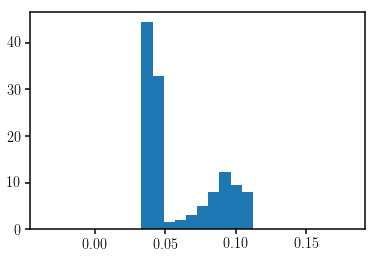

In [19]:
plt.hist(mgb['REDSHIFT'][0][mgb['SNAP'][0]], density=True)

In [50]:
sfr_z0 = np.log10(mgb['SFR_T'][0][:,-5]) - 9.
ms_z0 = np.log10(mgb['MSTEL_T'][0][:,-5])

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


(-2.0, 2.0)

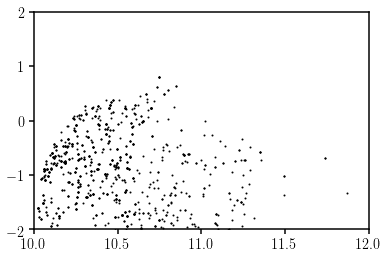

In [51]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(ms_z0, sfr_z0, c='k', s=1)
sub.set_xlim([10., 12.])
sub.set_ylim([-2., 2.])

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


(-3.0, 2)

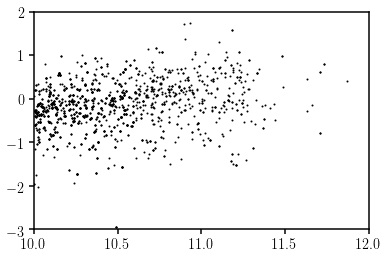

In [52]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(np.log10(mgb['MSTEL_OBS']), np.log10(mgb['SFR_OBS']), c='k', s=1)
sub.set_xlim([10., 12.])
sub.set_ylim([-3., 2])

In [74]:
ms_z0, sfr_z0 = [], []
for i in range(mgb['SFR_OBS'].shape[1]): 
    ms_z0.append(np.log10(mgb['MSTEL_T'][0][i,mgb['SNAP'][0][i]]))
    sfr_z0.append(np.log10(mgb['SFR_T'][0][i,mgb['SNAP'][0][i]])-9.)
    #print np.log10(mgb['SFR_OBS'][0][i]), (np.log10(mgb['SFR_MOD_SNAP'][0][i])-9.), (np.log10(mgb['SFR_T'][0][i,mgb['SNAP'][0][i]])-9.)

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


(-3.0, 2.0)

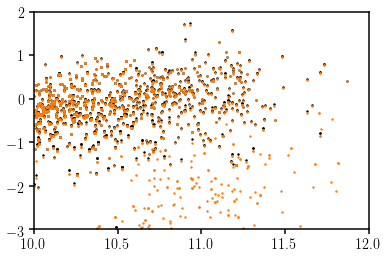

In [77]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(np.log10(mgb['MSTEL_OBS']), np.log10(mgb['SFR_OBS']), c='k', s=2)
sub.scatter(ms_z0, sfr_z0, c='C1', s=2)
sub.set_xlim([10., 12.])
sub.set_ylim([-3., 2.])

In [80]:
i_z1 = np.argmin(np.abs(mgb['REDSHIFT'][0] - 1.))

(-3.0, 3.0)

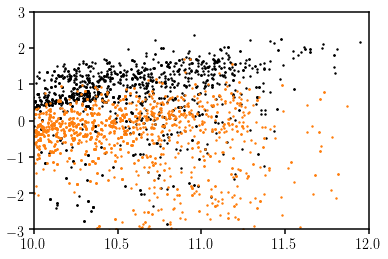

In [83]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(np.log10(mgb['MSTEL_T'][0][:,i_z1]), np.log10(mgb['SFR_T'][0][:,i_z1]) - 9., c='k', s=2)
sub.scatter(ms_z0, sfr_z0, c='C1', s=2)
sub.set_xlim([10., 12.])
sub.set_ylim([-3., 3.])


(array([ 23.,  38.,  84., 171., 288., 278., 353., 186., 200., 154.]),
 array([ 9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. ]),
 <a list of 10 Patch objects>)

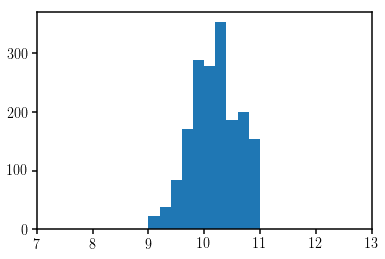

In [85]:
plt.hist(np.log10(mgb['MSTEL_T'][0][:,i_z1]), range=(9., 11.))